In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Data loading & preparing

In [13]:
data = pd.read_csv('data/training_mush.csv')
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 6093 non-null   int64
 1   cap-surface               6093 non-null   int64
 2   cap-color                 6093 non-null   int64
 3   bruises                   6093 non-null   int64
 4   odor                      6093 non-null   int64
 5   gill-attachment           6093 non-null   int64
 6   gill-spacing              6093 non-null   int64
 7   gill-size                 6093 non-null   int64
 8   gill-color                6093 non-null   int64
 9   stalk-shape               6093 non-null   int64
 10  stalk-root                6093 non-null   int64
 11  stalk-surface-above-ring  6093 non-null   int64
 12  stalk-surface-below-ring  6093 non-null   int64
 13  stalk-color-above-ring    6093 non-null   int64
 14  stalk-color-below-ring    6093 non-null 

In [18]:
features = data.drop(labels='class', axis=1)
target = data['class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
X_train.shape

(4569, 22)

## Task 1: Random Forest training

In [20]:
parameters = {'n_estimators': range(10, 60, 10),
              'max_depth': range(1, 14, 2),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 11, 2)}
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                    param_grid=parameters,
                    cv=3,
                    n_jobs=-1) # использовать все процессоры
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print('Наилучший набор параметров: {}'.format(grid.best_params_))

Наилучший набор параметров: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


## Task 2: features importances

In [21]:
pd.DataFrame({'features':list(X_train),
              'importances': best_model.feature_importances_}) \
             .sort_values('importances', ascending=False)

,features,importances
4,odor,0.266751
7,gill-size,0.084327
10,stalk-root,0.083675
6,gill-spacing,0.083255
8,gill-color,0.080394
19,spore-print-color,0.069281
18,ring-type,0.068302
3,bruises,0.044781
20,population,0.038505
21,habitat,0.037585


## Task 3: testing our model

In [22]:
test_data = pd.read_csv('data/testing_mush.csv')
test_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [28]:
X = test_data.to_numpy()
y_pred = best_model.predict(X)
sum(y_pred)

973

## Task 4: building confusion matrix

In [32]:
real_target_for_test = pd.read_csv('data/testing_y_mush.csv')
real_target_for_test = real_target_for_test.to_numpy().reshape(-1)

In [33]:
data_for_conf_matrix = pd.DataFrame({'predicted': y_pred,
                                     'real': real_target_for_test})
data_for_conf_matrix

,predicted,real
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
2026,1,1
2027,0,0
2028,1,1
2029,0,0


In [34]:
conf_matrix = pd.crosstab(data_for_conf_matrix['predicted'],
                          data_for_conf_matrix['real'])
conf_matrix

real,0,1
predicted,,
0,1055,3
1,0,973


<AxesSubplot:xlabel='real', ylabel='predicted'>

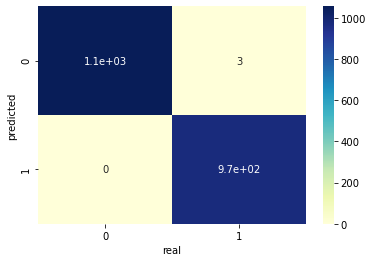

In [38]:
sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True)

# New data loadind & preparing

In [45]:
data = pd.read_csv('data/invasion.csv')
data.head()
print('Число строк {} и число признаков {}'.format(len(data), len(data.columns)))

Число строк 500 и число признаков 7


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               500 non-null    object 
 1   g_reflection        500 non-null    float64
 2   i_reflection        500 non-null    float64
 3   speed               500 non-null    float64
 4   brightness          500 non-null    float64
 5   time_of_observance  500 non-null    int64  
 6   volume              500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [52]:
data.groupby('class').agg({'speed':'count'}).rename(columns={'speed':'count'})

,count
class,
cruiser,70
fighter,225
transport,205


In [53]:
features = data.drop(axis=1, labels='class')
target = data['class']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, target)
X_train.shape

(375, 6)

In [59]:
data_for_test = pd.read_csv('data/operative_information.csv')
X = data_for_test.to_numpy()

# Task 5: training and testing RandomForest

In [68]:
# will use parameters from last tasks
parameters = {'n_estimators': range(10, 30, 5),
              'max_depth': range(1, 12),
              'min_samples_leaf': range(2, 8),
              'min_samples_split': range(2, 11)}

grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                    param_grid=parameters,
                    cv=3).fit(X_train, y_train)

In [69]:
print('Наилучшая конфигурация: ', grid.best_params_)
grid.score(X_test, y_test)

Наилучшая конфигурация:  {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15}


1.0

In [70]:
y_pred = grid.predict(X)
np.unique(y_pred, return_counts=True)

(array(['cruiser', 'fighter', 'transport'], dtype=object),
 array([230, 675, 595], dtype=int64))

In [71]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X)
np.unique(y_pred, return_counts=True)

(array(['cruiser', 'fighter', 'transport'], dtype=object),
 array([230, 675, 595], dtype=int64))

## Task 6: feature importance

In [73]:
pd.DataFrame({'feature': list(X_train),
              'importance': best_model.feature_importances_}) \
            .sort_values('importance', ascending=False)

,feature,importance
5,volume,0.370737
3,brightness,0.263929
1,i_reflection,0.133712
0,g_reflection,0.128653
2,speed,0.102968
4,time_of_observance,0.000000


# Taks 7: data analysis

In [74]:
data_for_analyze = pd.read_csv('data/space_can_be_a_dangerous_place.csv')
data_for_analyze.head(3)

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1


<AxesSubplot:xlabel='buggers_were_noticed', ylabel='dangerous'>

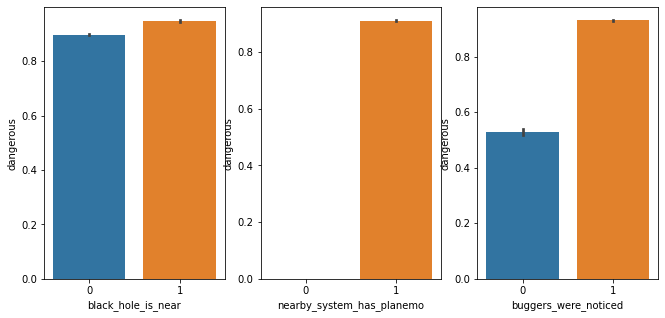

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(11, 5))
sns.barplot(data = data_for_analyze, x='black_hole_is_near', y='dangerous', ax=ax[0])
sns.barplot(data = data_for_analyze, x='nearby_system_has_planemo', y='dangerous', ax=ax[1])
sns.barplot(data = data_for_analyze, x='buggers_were_noticed', y='dangerous', ax=ax[2])